In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Data fields**

*   N - ratio of Nitrogen content in soil
*   P - ratio of Phosphorous content in soil
*   K - ratio of Potassium content in soil
*   temperature - temperature in degree Celsius
*   humidity - relative humidity in %
*   ph - ph value of the soil
*   rainfall - rainfall in mm
*   label - crop suitable in the conditions

In [3]:
df=pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
df1=df.copy()
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df1['label']= label_encoder.fit_transform(df1['label'])
df1['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

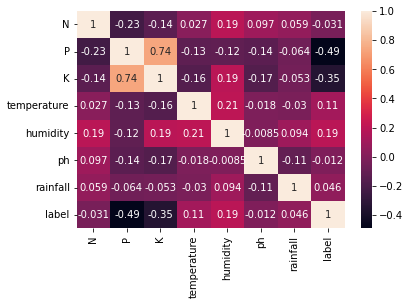

In [7]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

<AxesSubplot:xlabel='count', ylabel='label'>

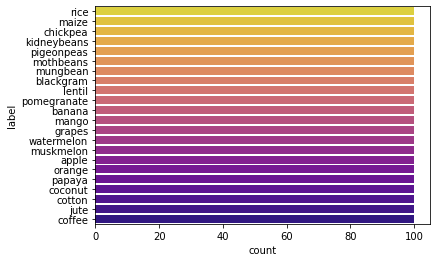

In [8]:
sns.countplot(y='label',data=df, palette="plasma_r")

In [9]:
selected_features = {'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'}
selected_features

{'K', 'N', 'P', 'humidity', 'ph', 'rainfall', 'temperature'}

In [10]:
def crop_relation_visual(yfeature):
    ax = sns.set_style('whitegrid')
    plt.subplots(figsize=(15,8))

    ax = sns.barplot(x="label", y=yfeature, data=df, ci=None)
    ax.bar_label(ax.containers[0], fontsize=12)

    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(rotation=0, fontsize=14)
    plt.title("Crops Relation with " + str(yfeature), fontsize = 24)
    plt.xlabel("Crops Name", fontsize = 18)
    plt.ylabel("values of " + str(yfeature), fontsize = 18)

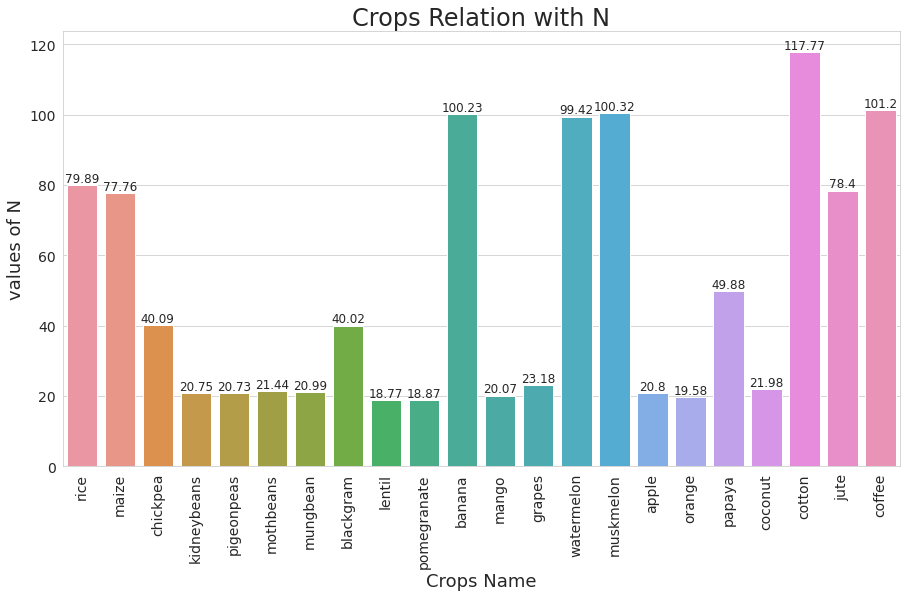

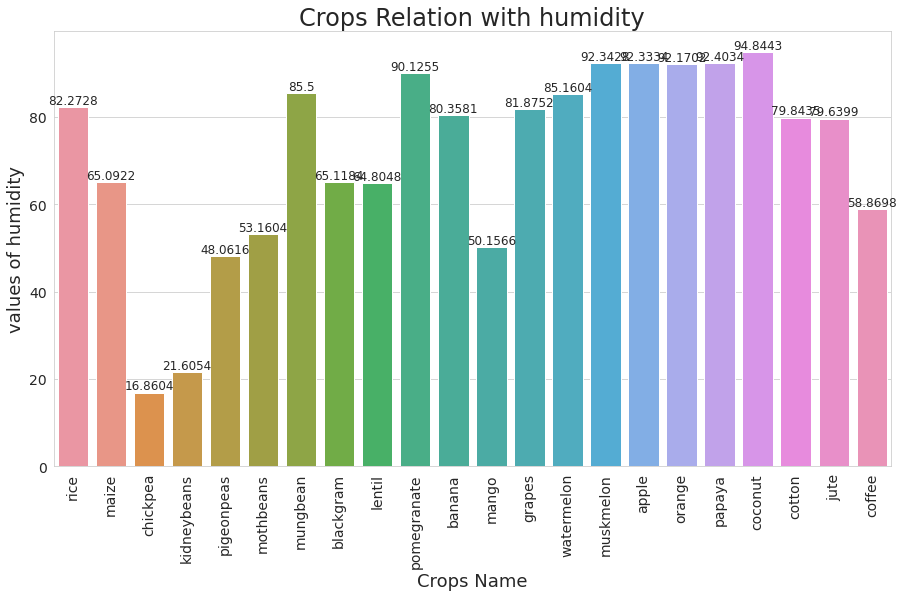

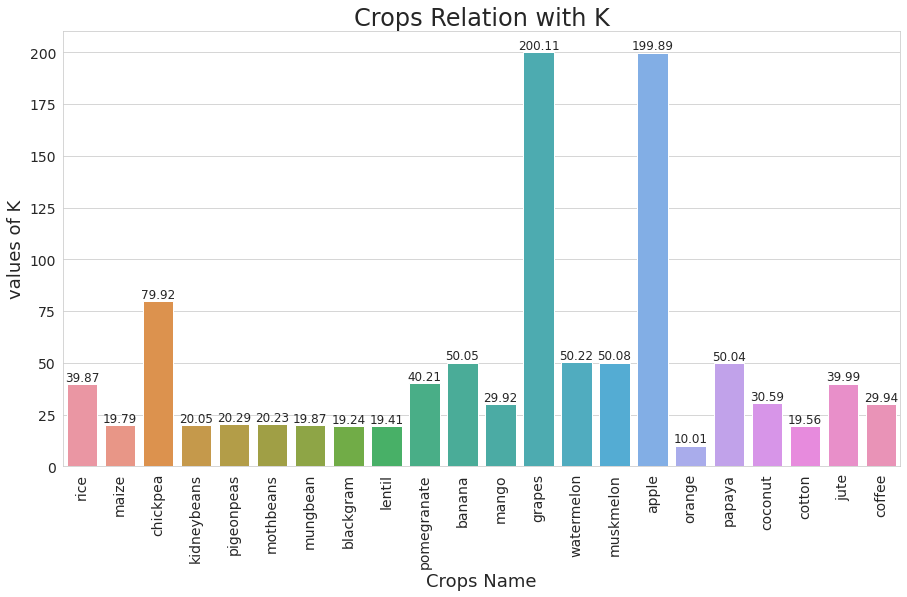

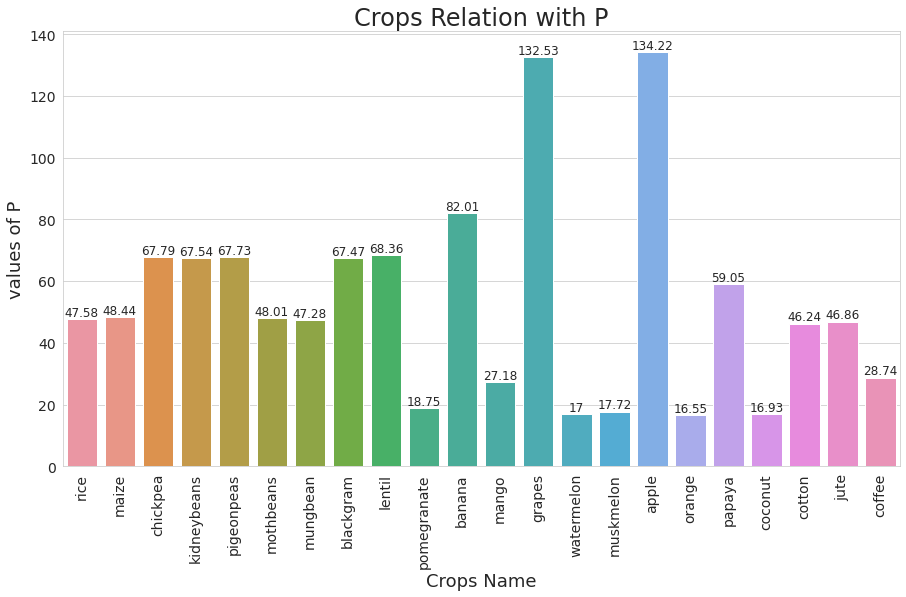

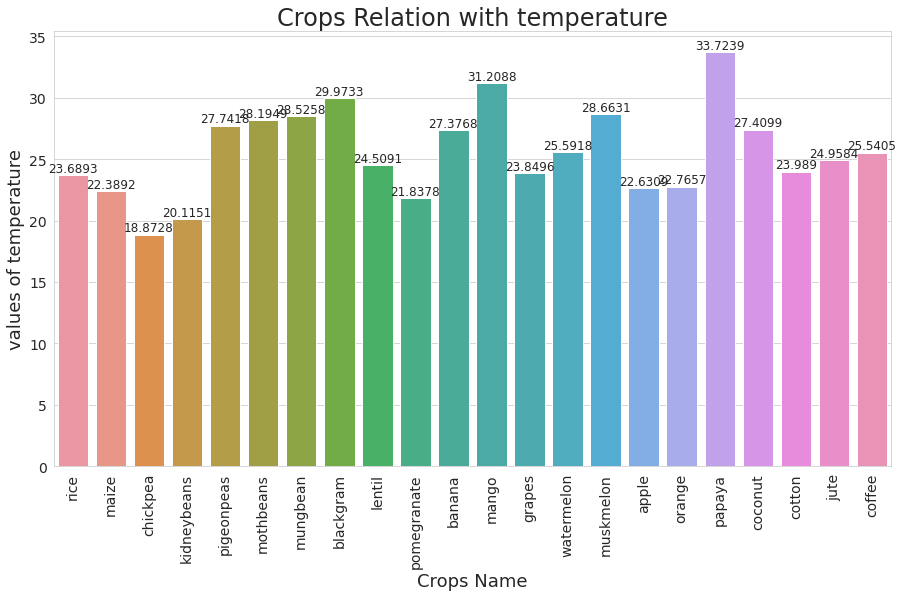

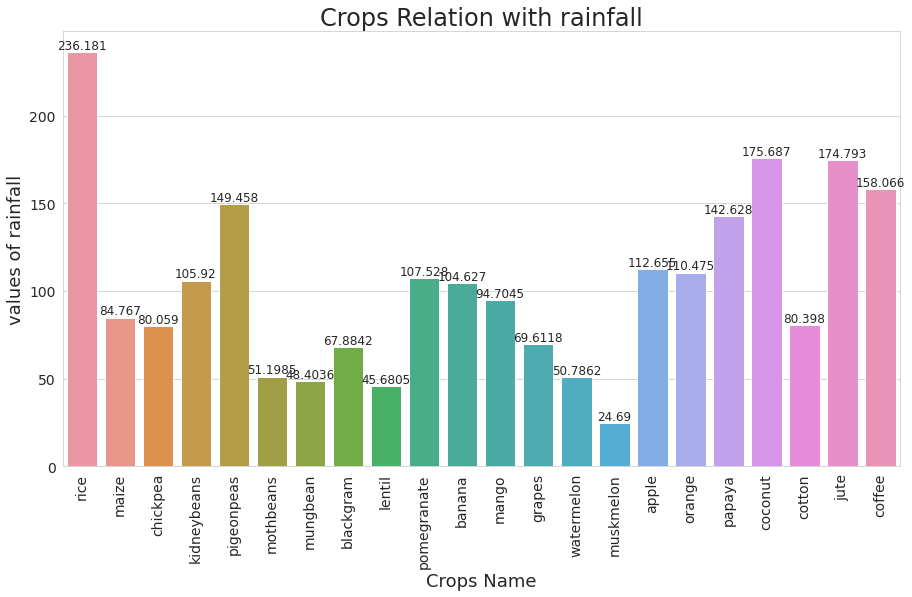

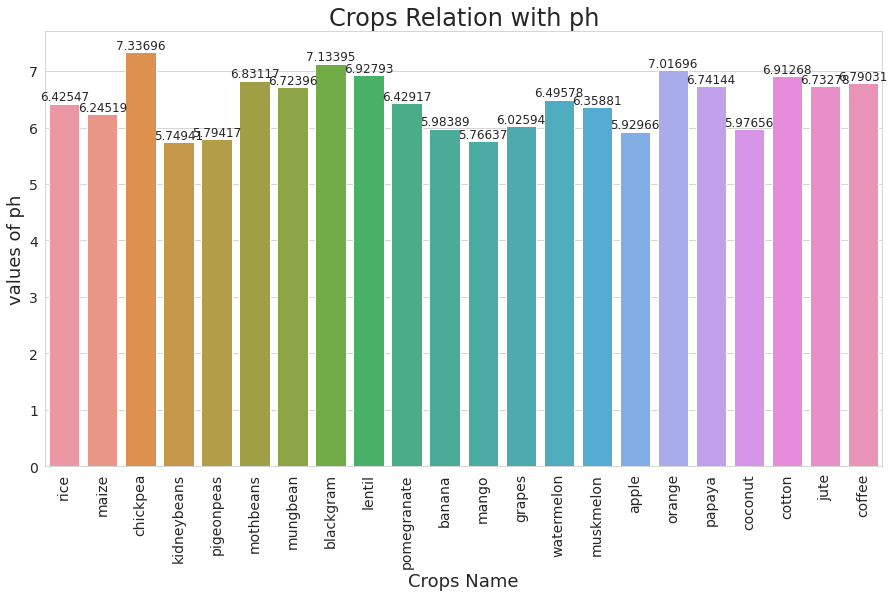

In [11]:
for x in selected_features:
    crop_relation_visual(x)

In [12]:
def crop_boxplot_visual(yfeature):
    ax = sns.set_style('whitegrid')
    plt.subplots(figsize=(15,8))
    sns.boxplot(x=yfeature, y="label", data=df)

    plt.title("Crops Relation with " + str(yfeature), fontsize = 24)
    plt.xlabel("values of " + str(yfeature), fontsize = 18)
    plt.ylabel("Crops Name", fontsize = 18)

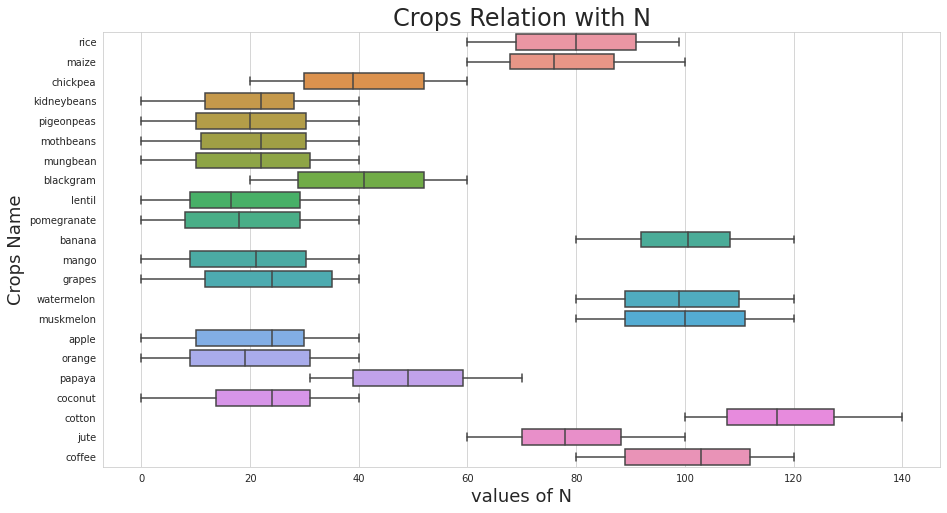

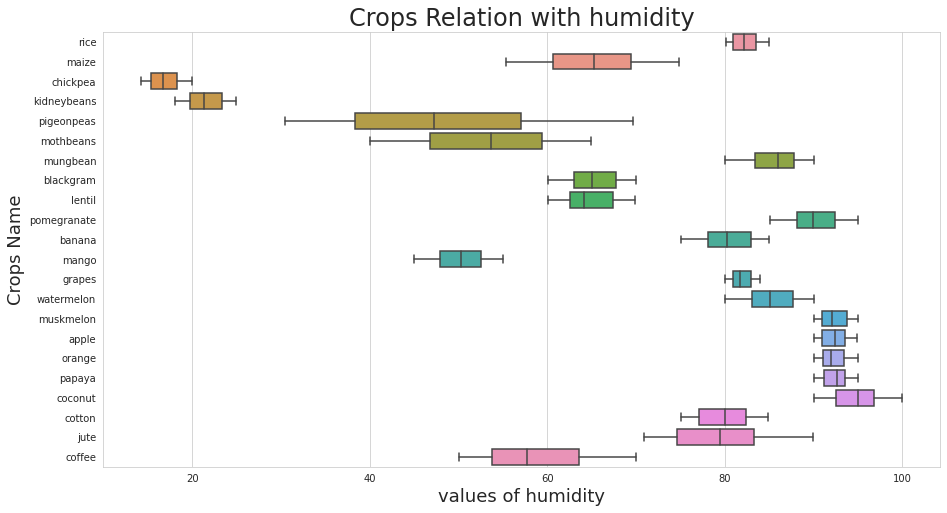

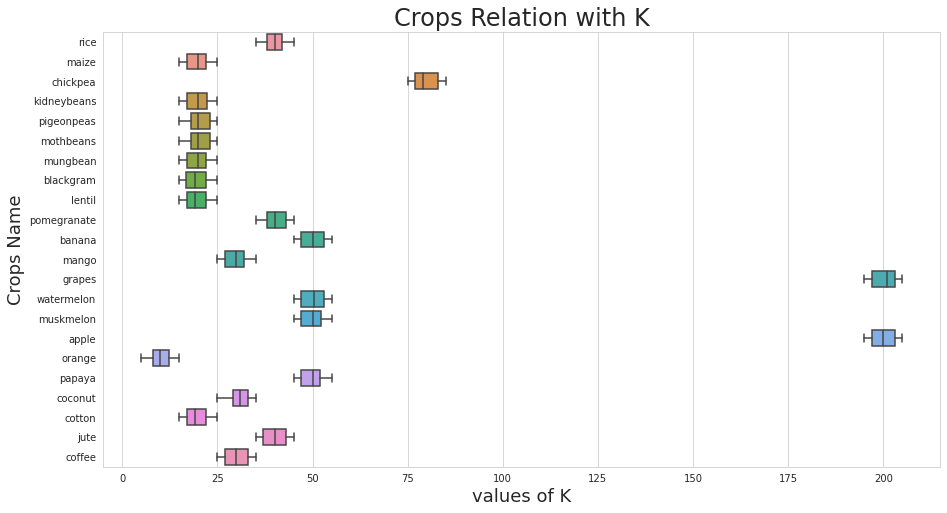

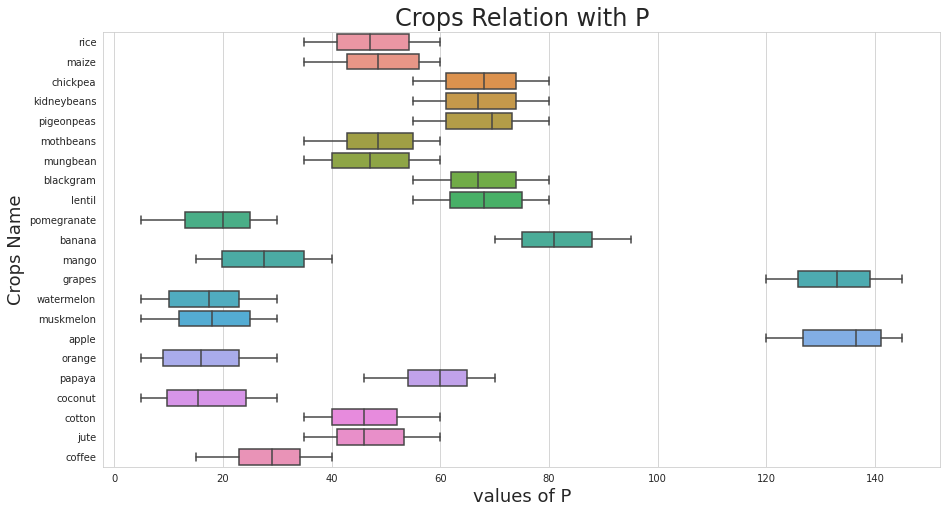

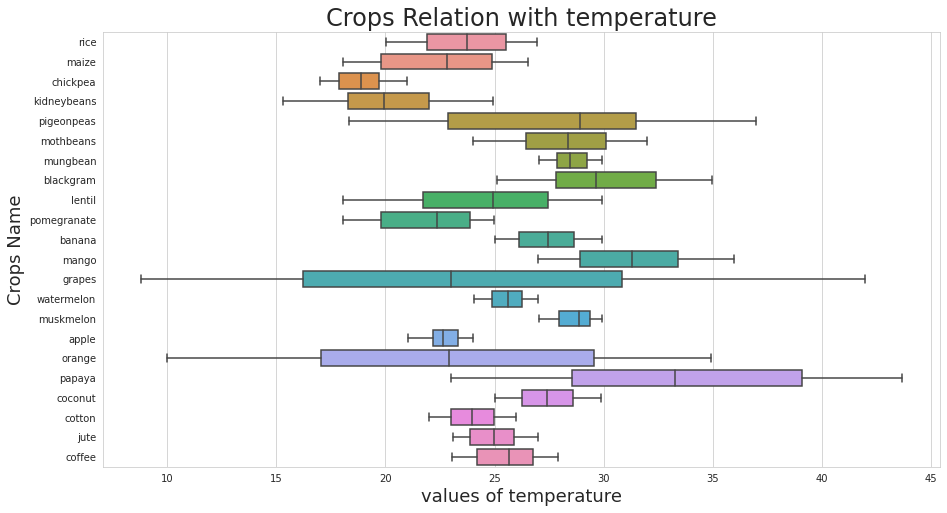

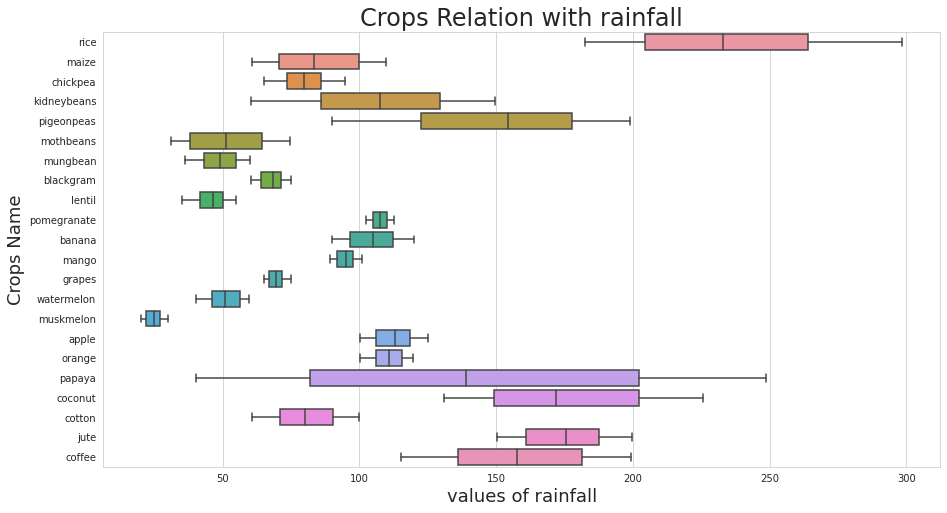

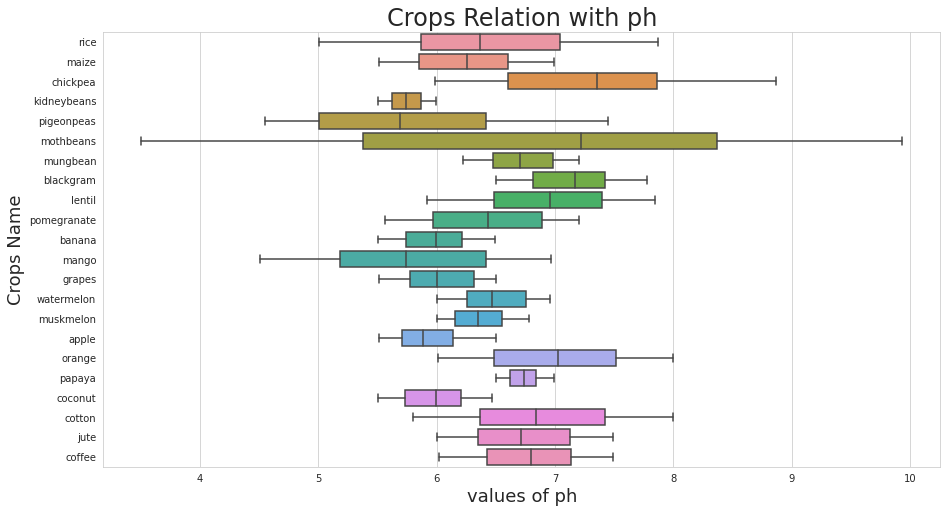

In [13]:
for x in selected_features:
    crop_boxplot_visual(x)

In [14]:
def crop_lineplot_visual(yfeature):
    ax = sns.set_style('whitegrid')
    plt.subplots(figsize=(14, 8))
    
    sns.lineplot(x=yfeature, y="label", data=df, ci=None)

    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(rotation=0, fontsize=14)
    plt.title("Crops Relation with " + str(yfeature), fontsize = 24)
    plt.xlabel("values of " + str(yfeature), fontsize = 18)
    plt.ylabel("Crops Name", fontsize = 18)

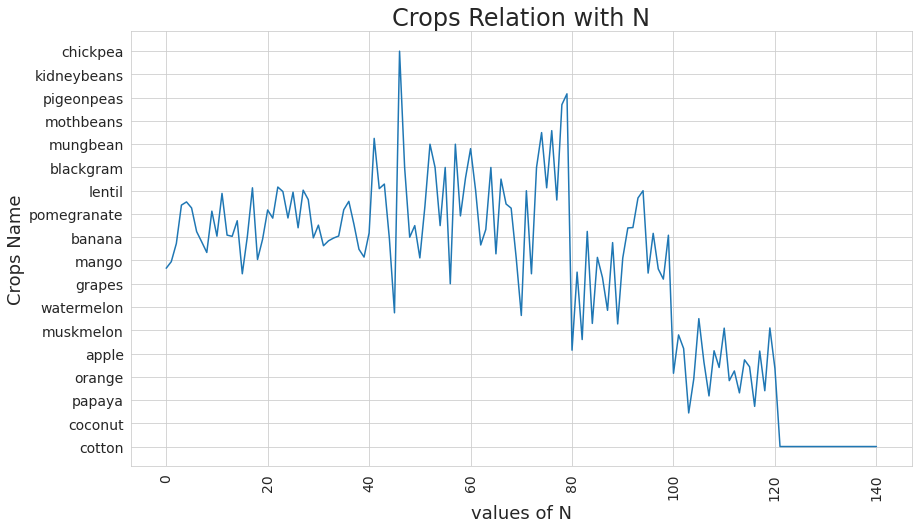

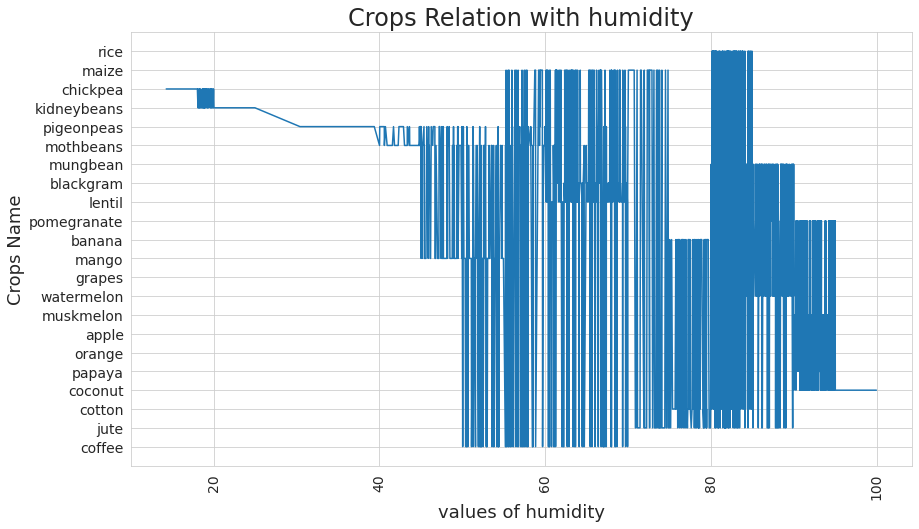

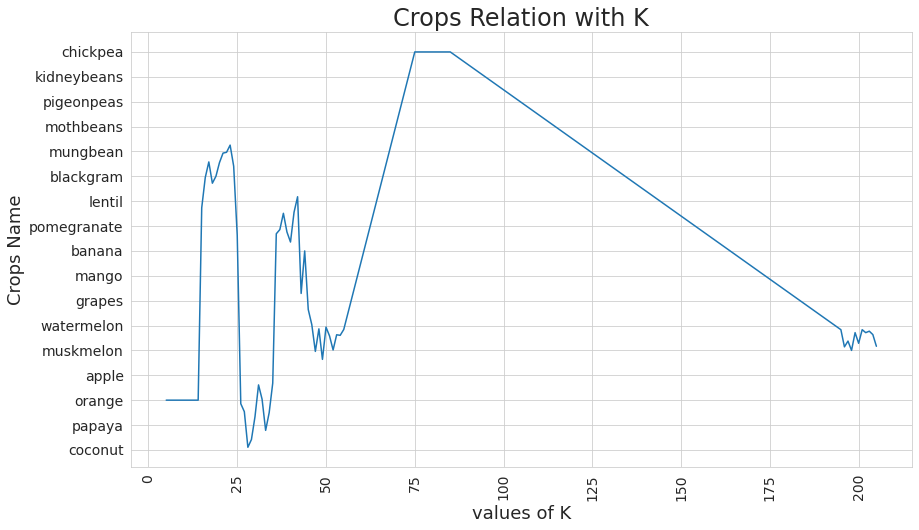

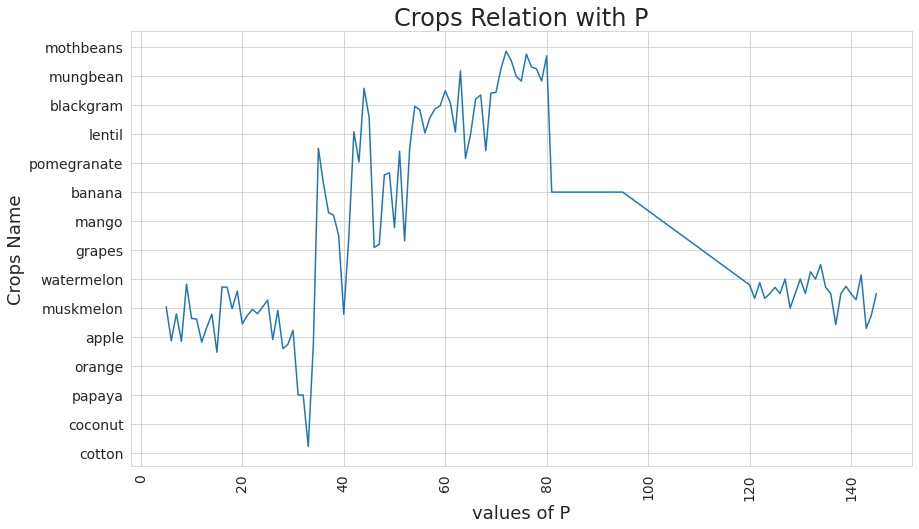

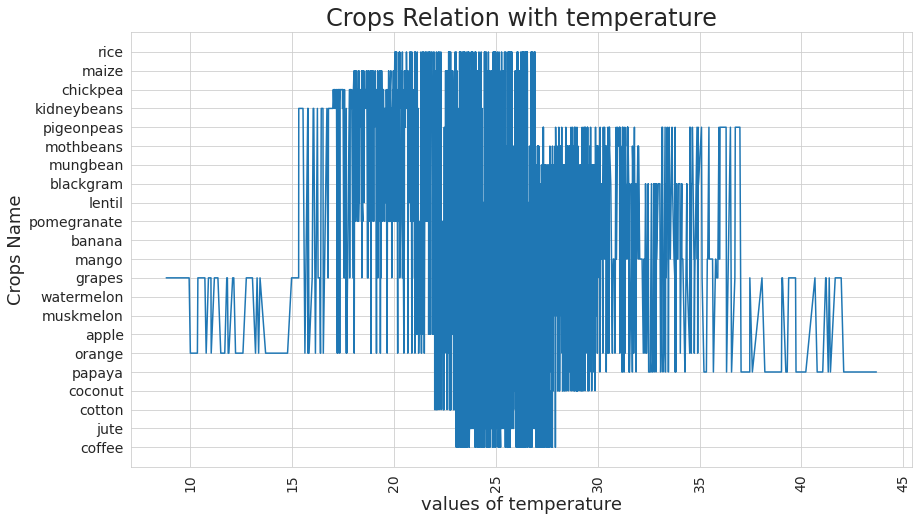

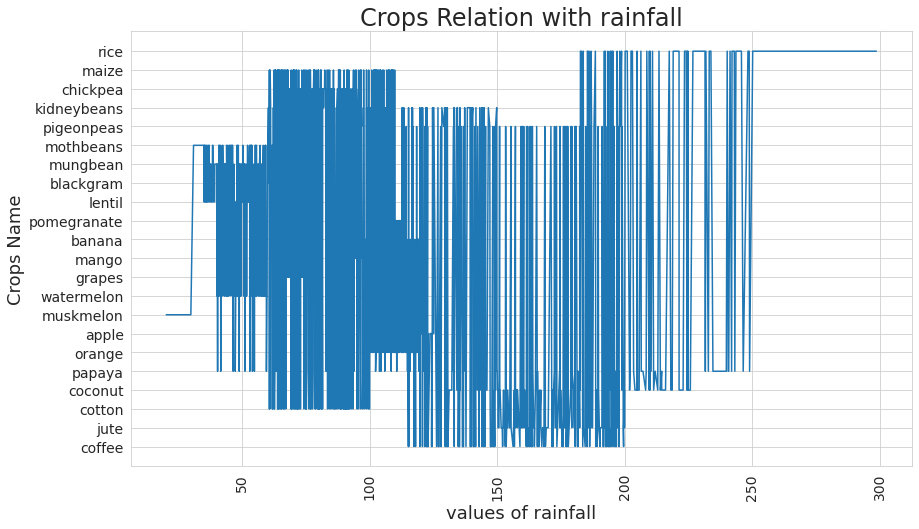

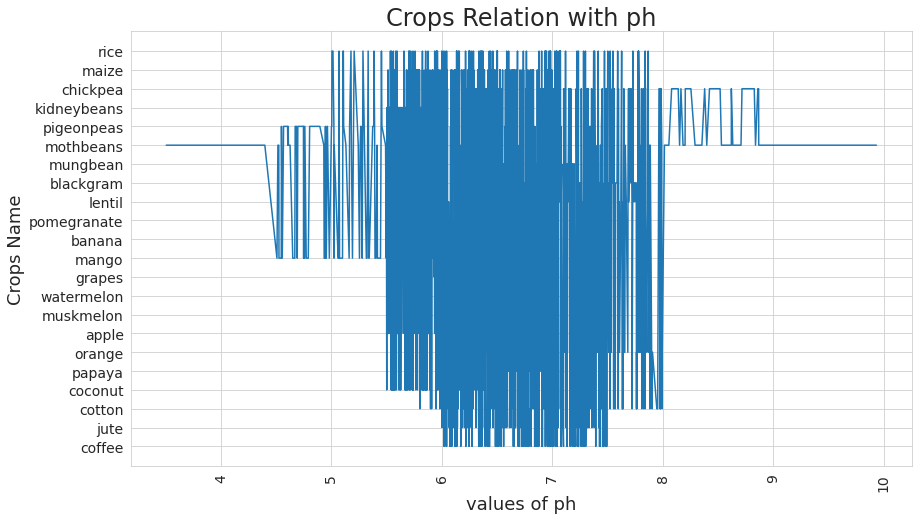

In [15]:
for x in selected_features:
    crop_lineplot_visual(x)

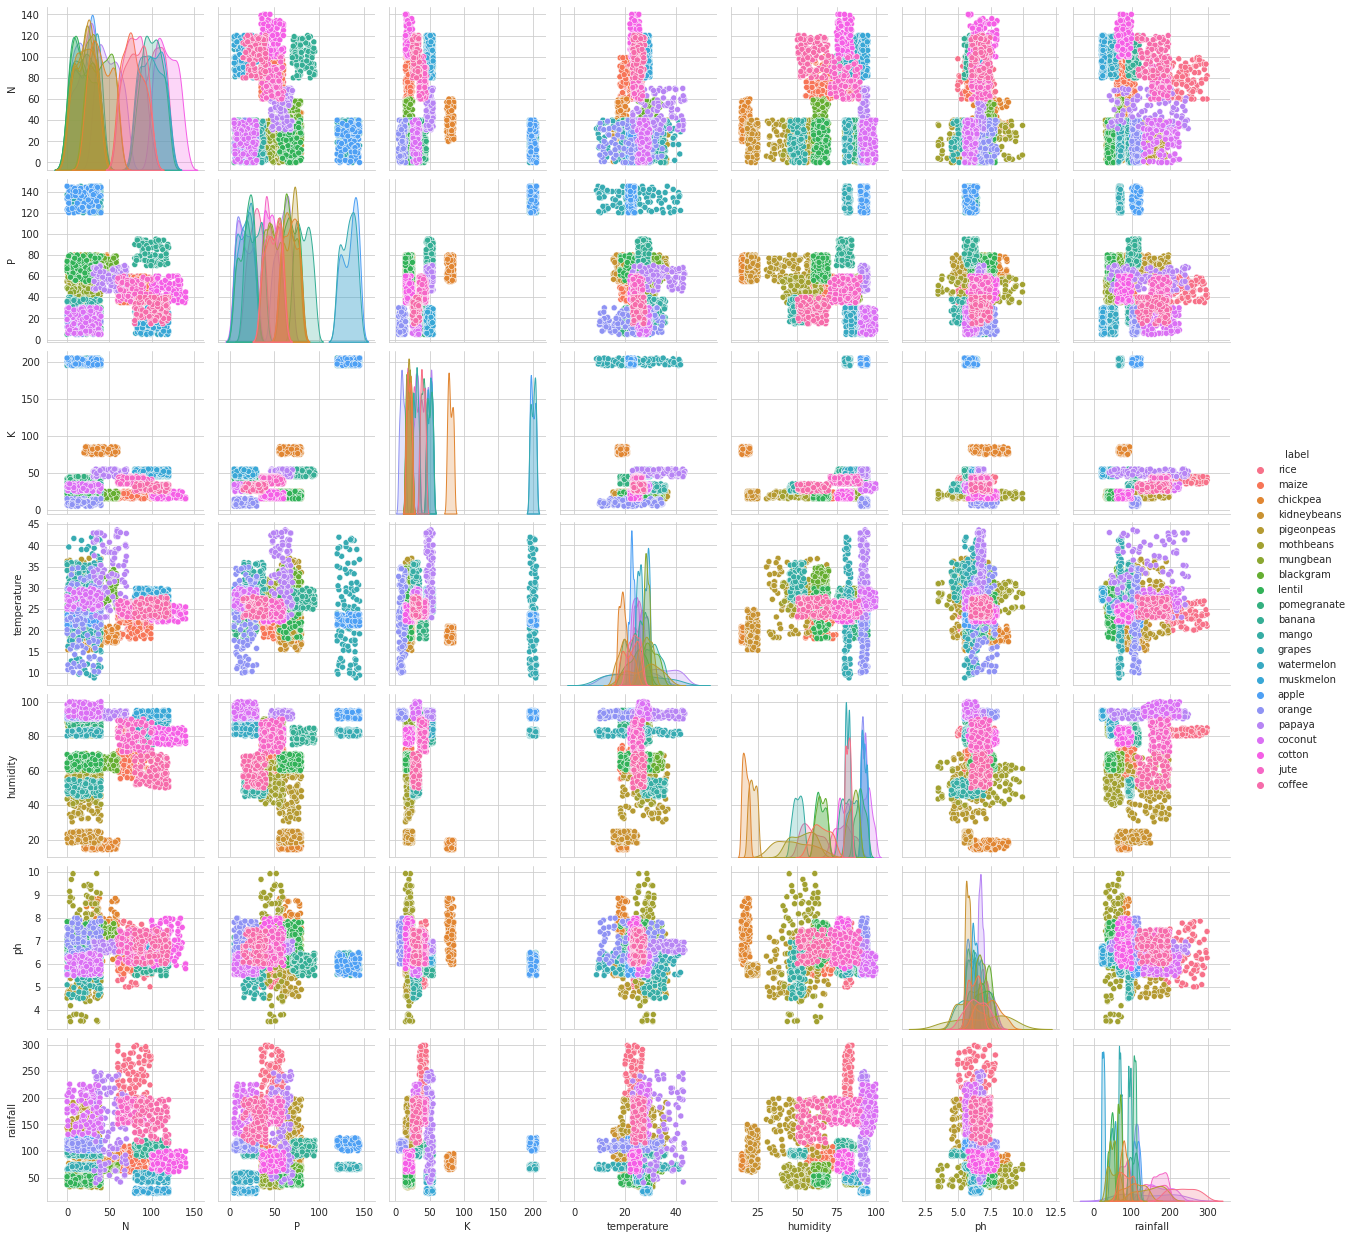

In [16]:
sns.pairplot(df, hue = 'label')

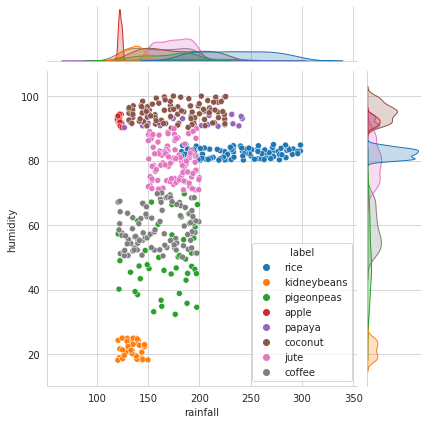

In [17]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['rainfall']>120)],hue="label")

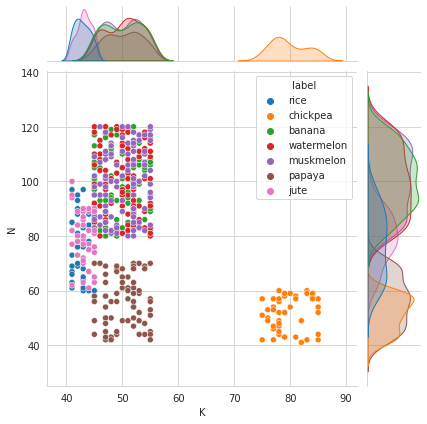

In [18]:
sns.jointplot(x="K",y="N",data=df[(df['N']>40)&(df['K']>40)],hue="label")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


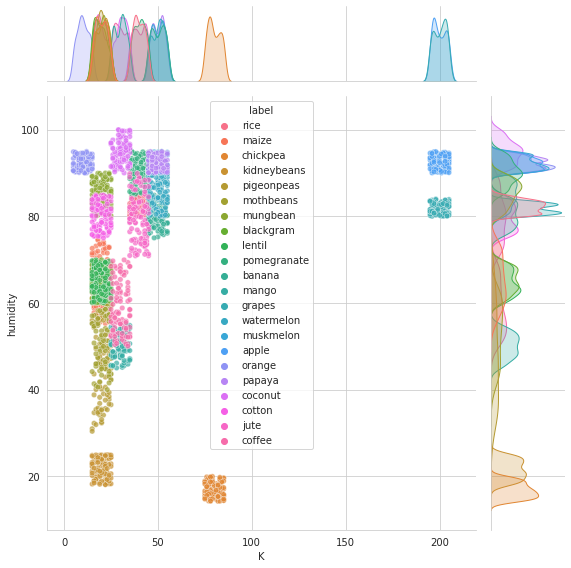

In [19]:
sns.jointplot(x="K",y="humidity",data=df,hue='label',size=8,s=30,alpha=0.7)

<AxesSubplot:xlabel='P', ylabel='label'>

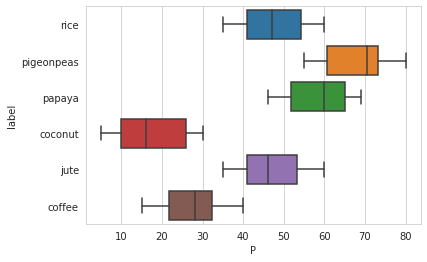

In [20]:
sns.boxplot(y='label',x='P',data=df[df['rainfall']>150])

<AxesSubplot:xlabel='K', ylabel='rainfall'>

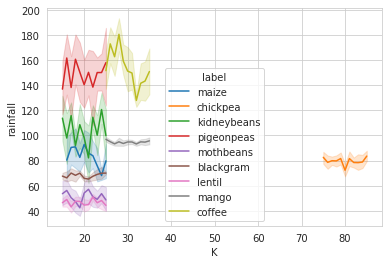

In [21]:
sns.lineplot(data = df[(df['humidity']<65)], x = "K", y = "rainfall",hue="label")

In [22]:
c=df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.target
X=df[['N','P','K','temperature','humidity','ph','rainfall']]

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [24]:
accuracy_train = []
accuracy_test = []
model_name = []

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.9781818181818182

<AxesSubplot:>

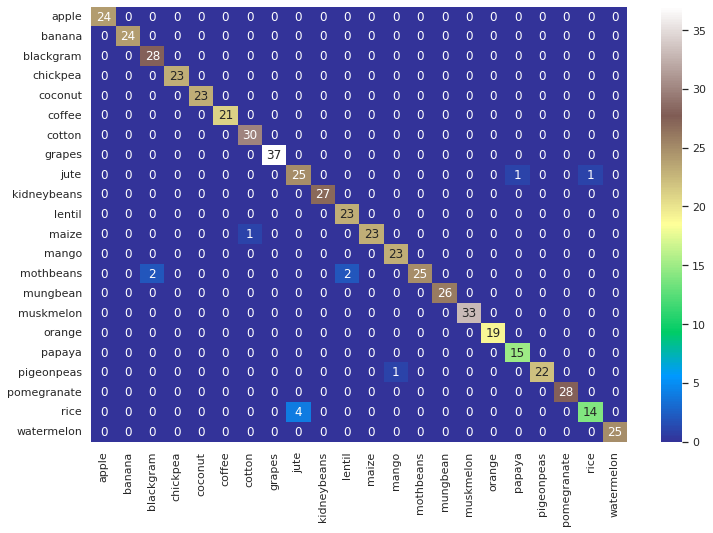

In [26]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,knn.predict(X_test_scaled))
df_cm = pd.DataFrame(mat, list(targets.values()), list(targets.values()))
sns.set(font_scale=1.0) 
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12},cmap="terrain")

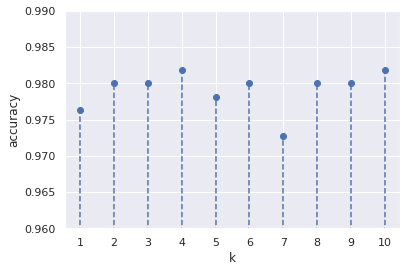

In [27]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed")
plt.ylim(0.96,0.99)
plt.xticks([i for i in range(1,11)]);

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn4 = KNeighborsClassifier(n_neighbors=4)
knn4.fit(X_train_scaled, y_train)
knn4.score(X_test_scaled, y_test)

0.9818181818181818

In [29]:
from sklearn.metrics import accuracy_score

knn_predict_train = knn4.predict(X_train_scaled)
knn_accuracy_train = accuracy_score( y_train, knn_predict_train )
print(f"Accuracy on Train Data: {knn_accuracy_train * 100}%")

knn_predict_test = knn4.predict(X_test_scaled)
knn_accuracy_test = accuracy_score(y_test, knn_predict_test)
print(f"Accuracy on Test Data: {knn_accuracy_test * 100}%")

accuracy_train.append( (knn_accuracy_train) * 100 )
accuracy_test.append( (knn_accuracy_test) * 100 )
model_name.append('KNN Classifier')

Accuracy on Train Data: 98.9090909090909%
Accuracy on Test Data: 98.18181818181819%


In [30]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
clf.score(X_test,y_test)

0.9872727272727273

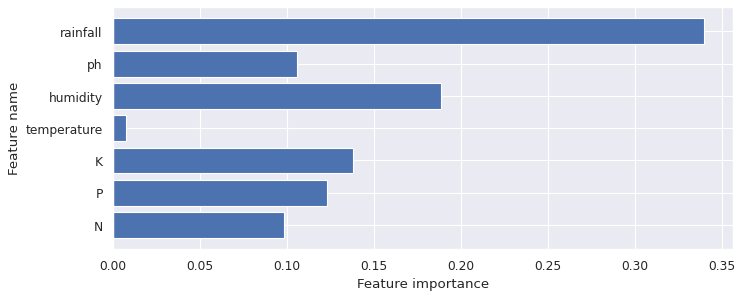

In [31]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), clf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

In [32]:
dt_predict_train = clf.predict(X_train)
dt_accuracy_train = accuracy_score( y_train, dt_predict_train )
print(f"Accuracy on Train Data: {dt_accuracy_train * 100}%")

dt_predict_test = clf.predict(X_test)
dt_accuracy_test = accuracy_score(y_test, dt_predict_test)
print(f"Accuracy on Test Data: {dt_accuracy_test * 100}%")

accuracy_train.append( (dt_accuracy_train) * 100 )
accuracy_test.append( (dt_accuracy_test) * 100 )
model_name.append('Decision Tree Classifier')

Accuracy on Train Data: 100.0%
Accuracy on Test Data: 98.72727272727273%


In [33]:
dftable = pd.DataFrame(columns={'accuracy_train', 'accuracy_test', 'model_name'})
dftable['accuracy_train'] = accuracy_train
dftable['accuracy_test'] = accuracy_test
dftable['model_name'] = model_name
dftable = dftable[['model_name', 'accuracy_train', 'accuracy_test']]
dftable

,model_name,accuracy_train,accuracy_test
0,KNN Classifier,98.909091,98.181818
1,Decision Tree Classifier,100.000000,98.727273
